In [1]:
from Portfolio import Portfolio, universe # universe is a global variable
# and each portfolio can access to the universe


In [2]:
import imp
from Admin import Admin
import pandas as pd
# imp.reload(Admin)

In [3]:
universe.get_security('GAPSX').price
# 'CIM.AX',	'GAPSX',	'LNC',	'KNEBV.HE'

Unnamed: 0
2000-01-01          NaN
2000-01-02          NaN
2000-01-03     8.299891
2000-01-04     8.095037
2000-01-05     8.009132
2000-01-06     7.962875
2000-01-07     8.134686
2000-01-08     8.134686
2000-01-09     8.134686
2000-01-10     8.233809
2000-01-11     8.174335
2000-01-12     8.134686
2000-01-13     8.227203
2000-01-14     8.299891
2000-01-15     8.299891
2000-01-16     8.299891
2000-01-17     8.299891
2000-01-18     8.280067
2000-01-19     8.253634
2000-01-20     8.233809
2000-01-21     8.200769
2000-01-22     8.200769
2000-01-23     8.200769
2000-01-24     8.075214
2000-01-25     8.035563
2000-01-26     8.048779
2000-01-27     8.068607
2000-01-28     7.923225
2000-01-29     7.923225
2000-01-30     7.923225
                ...    
2019-05-03    18.740000
2019-05-04    18.740000
2019-05-05    18.740000
2019-05-06    18.590000
2019-05-07    18.270000
2019-05-08    18.250000
2019-05-09    18.150000
2019-05-10    18.240000
2019-05-11    18.240000
2019-05-12    18.240000
2019-

In [4]:
#Initialize admin
test_admin=Admin()
#
test_admin.suggestPortfolio('1','2014-04-01')

{'MRD.TO': -58.49883416285279,
 'CIM.AX': -275.5502545072637,
 'GAPSX': 9720.810249804525,
 'LNC': -955.3003543498188,
 'KNEBV.HE': 2811.0995676468524}

In [5]:
test_admin.portfolio.getPortfolioValue('2014-04-01')

199980.0

In [6]:
test_admin.trackPortfolio(rebalance_flag=True,rebalance_freq='3MS')

In [16]:
test_admin.portfolio.getPortfolioValue(start_date)

114749.11215645554

In [11]:
from datetime import datetime
date_format='%Y-%m-%d'
today_date='2019-06-01'
start_date='2014-04-01'
all_dates=[datetime.strftime(item,date_format) for item in pd.date_range(start_date,today_date,freq='M')]

In [12]:
portf_values=[]
for item in all_dates:
    portf_values.append(test_admin.portfolio.getPortfolioValue(item))

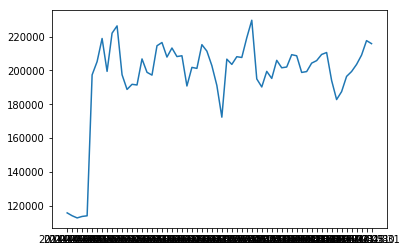

In [15]:
from matplotlib import pyplot as plt
plt.plot(all_dates,portf_values)